In [41]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy.stats import linregress
import random


In [42]:

manga_df = pd.read_csv(r"C:\Users\Jordan\Desktop\MAL-manga.csv", index_col='Unnamed: 0')
anime_df = pd.read_csv(r"C:\Users\Jordan\Desktop\anime_copy.csv", index_col= 'Unnamed: 0')

manga_df.head()
anime_df.head()

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44


In [43]:
cleaned_manga = manga_df.drop(columns=["page_url", "image_url"])
cleaned_manga.head()

,Title,Rank,Type,Volumes,Published,Members,Score
0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,8.16
1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,7.31
2,Rain,1808,Manga,?,Nov 2008 -,12021,7.67
3,Hidari no Futari,17377,One-shot,?,2011 - 2011,1010,5.95
4,Odd Girl Out,953,Manhwa,?,May 2015 -,4968,7.90


In [44]:
cleaned_anime = anime_df.drop(columns=["page_url", "image_url"])
cleaned_anime.head()

,Title,Rank,Type,Episodes,Aired,Members,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,6.44


In [45]:
cleaned_manga[cleaned_manga["Volumes"]== '?']

,Title,Rank,Type,Volumes,Published,Members,Score
2,Rain,1808,Manga,?,Nov 2008 -,12021,7.67
3,Hidari no Futari,17377,One-shot,?,2011 - 2011,1010,5.95
4,Odd Girl Out,953,Manhwa,?,May 2015 -,4968,7.90
7,Ruru Chouchou,13402,One-shot,?,Dec 2012 - Dec 2012,457,6.64
11,Kiratto!☆Yell,16913,One-shot,?,2012 - 2012,319,6.17
...,...,...,...,...,...,...,...
17793,Kimi wa Houkago Insomnia,109,Manga,?,May 2019 -,36829,8.55
17803,Super Lovers,717,Manga,?,Oct 2009 -,22933,8.01
17805,Yoru no Kouen,17791,One-shot,?,Jun 1982 - Jun 1982,197,5.31
17806,Akuyaku Reijou desu ga Kouryaku Taishou no You...,10635,Manga,?,Dec 2020 -,1142,6.85


In [46]:
cleaned_manga["Volumes"] = cleaned_manga['Volumes'].replace(['?'], "Unknown")
cleaned_manga

,Title,Rank,Type,Volumes,Published,Members,Score
0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,8.16
1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,7.31
2,Rain,1808,Manga,Unknown,Nov 2008 -,12021,7.67
3,Hidari no Futari,17377,One-shot,Unknown,2011 - 2011,1010,5.95
4,Odd Girl Out,953,Manhwa,Unknown,May 2015 -,4968,7.90
...,...,...,...,...,...,...,...
17806,Akuyaku Reijou desu ga Kouryaku Taishou no You...,10635,Manga,Unknown,Dec 2020 -,1142,6.85
17807,Hakuji,5720,Manga,2,May 2008 - Apr 2010,6103,7.21
17808,Maouritsu Chuu-Boss Yousei Academia,15889,Manga,3,Sep 2017 - Mar 2019,696,6.38
17809,Arakure Ojousama wa Monmon Shiteiru,7569,Manga,Unknown,Nov 2018 -,11257,7.07


In [47]:
cleaned_manga["Type"].unique()


array(['Manga', 'One-shot', 'Manhwa', 'Light-Novel', 'Doujinshi',
       'Manhua', 'Novel'], dtype=object)

In [48]:
cleaned_manga["Type"].value_counts()

Type
Manga          13667
One-shot        1564
Manhwa          1338
Light-Novel      905
Manhua           156
Doujinshi        139
Novel             42
Name: count, dtype: int64

In [49]:
cleaned_anime["Type"].value_counts()

Type
TV         4510
Movie      2485
Special    2014
ONA        1883
OVA        1881
Unknown       1
Name: count, dtype: int64

In [50]:
top_manga = cleaned_manga.groupby("Type")["Score"]
top_manga.head()

0       8.16
1       7.31
2       7.67
3       5.95
4       7.90
5       6.07
6       6.74
7       6.64
11      6.17
12      7.09
14      7.43
15      6.82
16      6.28
36      6.40
38      8.34
44      6.85
76      6.20
91      6.64
116     6.42
126     7.14
152     7.74
155     6.34
159     6.99
167     8.62
267     6.52
274     6.96
290     7.43
308     6.90
419     7.05
445     6.01
1728    7.60
1816    7.27
2435    7.72
2639    8.60
3234    8.92
Name: Score, dtype: float64

In [51]:
avg_score_manga = cleaned_manga.groupby("Type")["Score"].mean()
avg_score_manga

Type
Doujinshi      6.734676
Light-Novel    7.468453
Manga          7.000712
Manhua         7.091538
Manhwa         7.076898
Novel          7.855714
One-shot       6.526790
Name: Score, dtype: float64

In [52]:
# Create a dataframe with average score of each kind of manga
manga_df = pd.DataFrame(avg_score_manga)
manga_df

,Score
Type,
Doujinshi,6.734676
Light-Novel,7.468453
Manga,7.000712
Manhua,7.091538
Manhwa,7.076898
Novel,7.855714
One-shot,6.526790


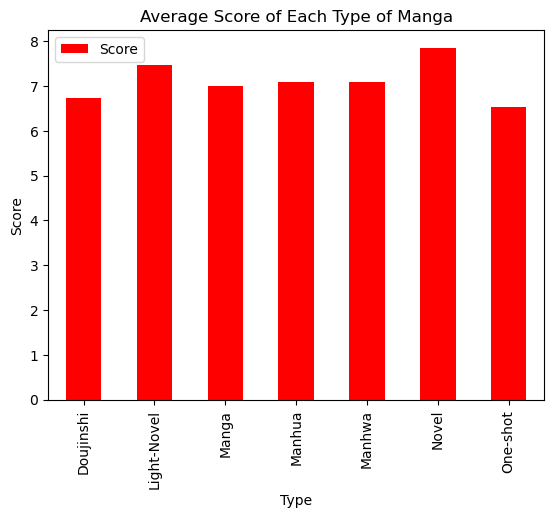

In [53]:
# Show average score based on kinds of manga
colors= ['r', 'b', 'm', 'y', 'c','r', 'b']
manga_type = manga_df.plot(kind="bar", color=colors)
plt.legend(loc="upper left")
plt.ylabel("Score")
plt.title("Average Score of Each Type of Manga")
plt.savefig("avg_score_type_manga.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

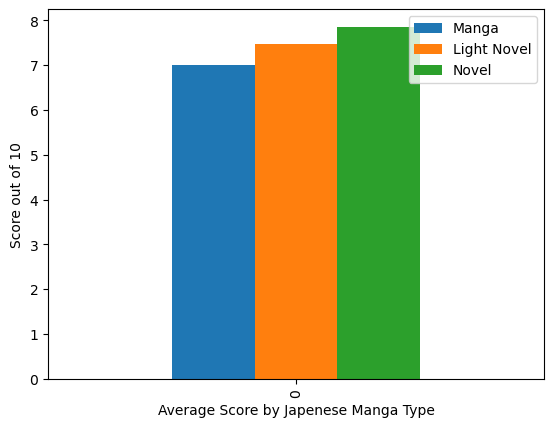

In [54]:
# Plot most popular Japenese Manga types on bar graph with average score values
manga_type = cleaned_manga.loc[cleaned_manga["Type"]== "Manga"]
light_novel = cleaned_manga.loc[cleaned_manga["Type"]== "Light-Novel"]
novel = cleaned_manga.loc[cleaned_manga["Type"]== "Novel"]

labels = ["Manga", "Light Novel", "Novel"]

avg_manga_score = manga_type["Score"].mean()
avg_light_novel = light_novel["Score"].mean()
avg_novel = novel["Score"].mean()

avg_score = pd.DataFrame([{"Manga": avg_manga_score,
                         "Light Novel": avg_light_novel,
                         "Novel": avg_novel}])

avg_score.plot(kind='bar')
plt.xlabel("Average Score by Japenese Manga Type")
plt.ylabel("Score out of 10")
plt.savefig("avg_score_top_3.png")
plt.show

In [55]:
# Create Dataframe by top 20 best Manga
manga_type
best_manga = manga_type.sort_values(by="Score",ascending=False).head(20)
best_manga

,Title,Rank,Type,Volumes,Published,Members,Score
11927,Berserk,1,Manga,Unknown,Aug 1989 -,637448,9.47
9294,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,Manga,24,Jan 2004 - Apr 2011,246104,9.30
7512,Vagabond,3,Manga,37,Sep 1998 - May 2015,345175,9.23
111,One Piece,4,Manga,Unknown,Jul 1997 -,573384,9.22
12864,Monster,5,Manga,18,Dec 1994 - Dec 2001,226020,9.15
6492,Slam Dunk,6,Manga,31,Sep 1990 - Jun 1996,156001,9.08
11993,Vinland Saga,7,Manga,Unknown,Apr 2005 -,279101,9.05
14711,Grand Blue,9,Manga,Unknown,Apr 2014 -,166433,9.03
14648,Fullmetal Alchemist,8,Manga,27,Jul 2001 - Sep 2010,282763,9.03
4242,Oyasumi Punpun,10,Manga,13,Mar 2007 - Nov 2013,409969,9.02


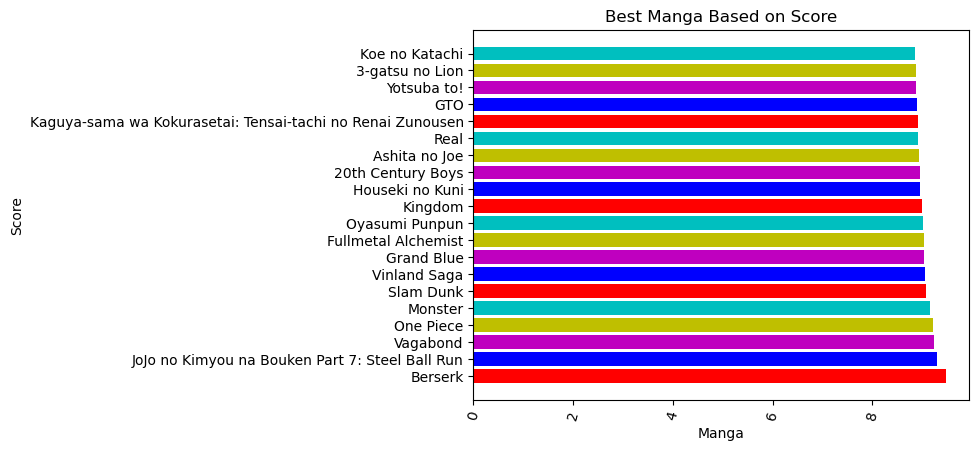

In [56]:
#Plot Best manga based on score
colors = ['r', 'b', 'm', 'y', 'c','r', 'b', 'm', 'y', 'c',
         'r', 'b', 'm', 'y', 'c','r', 'b', 'm', 'y', 'c',]
plt.barh(best_manga["Title"], best_manga["Score"], color=colors)
plt.xticks(rotation=75)

plt.xlabel("Manga")
plt.ylabel("Score")
plt.title("Best Manga Based on Score")
plt.savefig("best_20_manga_score.png")
plt.show() 

In [57]:
# Exclude manga with unknown volumes
clean_volumes = best_manga.loc[best_manga["Volumes"] != "Unknown"]
clean_volumes

,Title,Rank,Type,Volumes,Published,Members,Score
9294,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,Manga,24,Jan 2004 - Apr 2011,246104,9.30
7512,Vagabond,3,Manga,37,Sep 1998 - May 2015,345175,9.23
12864,Monster,5,Manga,18,Dec 1994 - Dec 2001,226020,9.15
6492,Slam Dunk,6,Manga,31,Sep 1990 - Jun 1996,156001,9.08
14648,Fullmetal Alchemist,8,Manga,27,Jul 2001 - Sep 2010,282763,9.03
4242,Oyasumi Punpun,10,Manga,13,Mar 2007 - Nov 2013,409969,9.02
15754,20th Century Boys,13,Manga,22,Sep 1999 - Apr 2006,233913,8.95
2433,Ashita no Joe,14,Manga,20,Jan 1968 - May 1973,48270,8.94
2300,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,17,Manga,28,May 2015 - Nov 2022,254790,8.92
8499,GTO,21,Manga,25,Dec 1996 - Jan 2002,159533,8.89


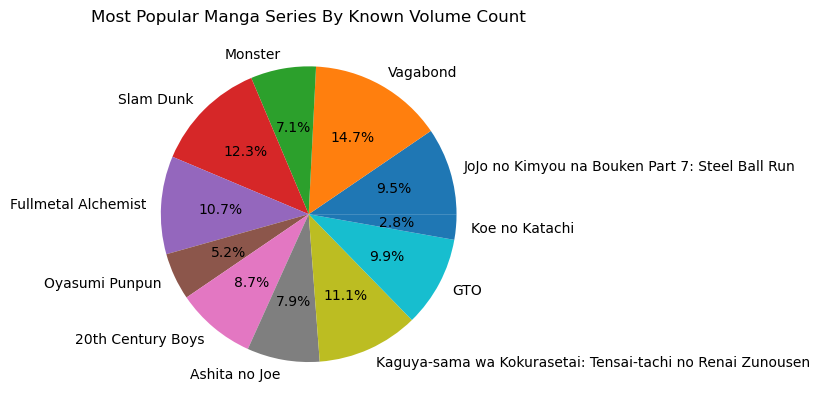

In [58]:
# Create pie plot of Best Manga by score with labels of volumes
volumes = clean_volumes["Volumes"]
labels = clean_volumes["Title"]
plt.pie(volumes, labels=labels, autopct="%1.1f%%")
plt.title("Most Popular Manga Series By Known Volume Count")
plt.savefig("pie_plot_best_manga_volume.png")
plt.show()

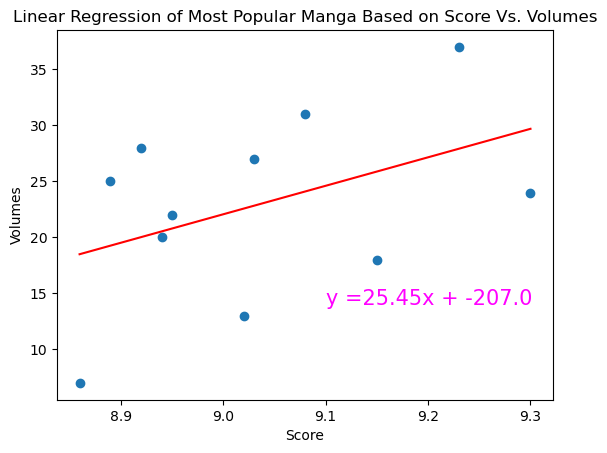

The p-value is : 0.1796857429837753
r-squared value is: 0.19039684149720212


In [59]:
# Create regression line to determine if volume count is statistically 
# Significant to score
x = clean_volumes["Score"]
y = volumes.astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x *slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (9.1, 14), fontsize=15, color="magenta")
plt.title("Linear Regression of Most Popular Manga Based on Score Vs. Volumes")
plt.xlabel("Score")
plt.ylabel("Volumes")
plt.savefig("lineregress_volumes.png")
plt.show()
print(f"The p-value is : {pvalue}")
print(f"r-squared value is: {rvalue**2}")